# Lab 4 - Hypothesis testing and statistical analysis

In [106]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random as rd
from scipy.stats import t
from scipy.stats import ttest_1samp

## Get the data (1 mark)

In [107]:
df = pd.read_csv("census11sample.csv")
df

,Unnamed: 0,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,0,27,32,65,60,44,79,43,8,9
1,1,10,36,40,19,52,46,58,87,40
2,2,82,53,60,34,2,29,18,46,57
3,3,33,63,25,60,9,26,30,52,74
4,4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...,...
995,995,42,59,47,37,61,67,29,16,21
996,996,49,45,16,80,87,86,4,79,74
997,997,31,5,25,39,52,22,17,8,34
998,998,38,69,52,4,3,76,24,51,94


## Divide the data (2 marks)

In [108]:
df = df.sample(frac=1, random_state=20)
sample_explore = df[:int(0.7 * len(df))]
sample_test = df[int(0.7 * len(df)):]
sample_explore = sample_explore.drop(columns = ['Unnamed: 0'])
sample_explore = sample_explore.sort_values(by=list(sample_explore.columns))
sample_test = sample_test.drop(columns = ['Unnamed: 0'])
sample_test

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
901,92,48,2,3,1,68,6,72,13
408,29,3,11,34,3,30,37,36,61
683,35,56,0,77,40,15,29,46,37
615,20,42,25,15,69,36,8,22,73
734,33,25,7,32,52,52,20,19,2
...,...,...,...,...,...,...,...,...,...
924,50,5,22,37,60,32,64,43,70
223,63,4,22,17,4,6,8,70,49
271,57,44,19,22,34,14,14,9,29
474,62,50,32,20,72,49,37,75,79


## Explore the data (5 marks)

In [109]:
modified_explore = pd.DataFrame(columns=sample_explore.columns)
index_values = [i for i in range(5, 105, 5)]
bin_edges = [i for i in range(0, 105, 5)]
modified_explore = modified_explore.reindex(index=range(1, 21), fill_value=pd.NA)
bin_labels = [f"{bin_edges[i]}-{index_values[i]}" for i in range(0,len(bin_edges)-1)]
modified_explore['Age Groups'] = pd.cut(index_values, bins=bin_edges, labels=bin_labels)
modified_explore['Age Groups'].astype(str)
modified_explore



,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West,Age Groups
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0-5
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,5-10
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10-15
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,15-20
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,20-25
6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,25-30
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,30-35
8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,35-40
9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,40-45
10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45-50


In [110]:
modified_explore = modified_explore.append({'Age Groups' : '100-114'}, ignore_index = True)
modified_explore

C:\Users\AYUSH GUPTA\AppData\Local\Temp\ipykernel_28384\1953388823.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modified_explore = modified_explore.append({'Age Groups' : '100-114'}, ignore_index = True)


,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West,Age Groups
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-15
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15-20
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-25
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-30
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-35
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35-40
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-45
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-50


In [111]:
counts = [0]*21
for name in sample_explore.columns: 
    for i in sample_explore[name]:
        counts[i // 5] += 1
    modified_explore[name] = counts
    counts = [0]*21
modified_explore


,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West,Age Groups
0,41,44,33,42,44,34,61,32,25,0-5
1,35,37,42,42,38,31,40,42,42,5-10
2,42,49,37,51,38,43,47,47,32,10-15
3,43,50,50,39,55,41,42,35,43,15-20
4,45,43,49,46,46,36,37,44,36,20-25
5,58,37,47,43,50,44,65,59,46,25-30
6,43,46,48,43,43,55,70,49,23,30-35
7,38,42,47,50,39,51,51,33,46,35-40
8,45,58,61,54,34,68,54,59,54,40-45
9,69,54,48,50,48,47,46,54,65,45-50


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '0-5'),
  Text(1, 0, '5-10'),
  Text(2, 0, '10-15'),
  Text(3, 0, '15-20'),
  Text(4, 0, '20-25'),
  Text(5, 0, '25-30'),
  Text(6, 0, '30-35'),
  Text(7, 0, '35-40'),
  Text(8, 0, '40-45'),
  Text(9, 0, '45-50'),
  Text(10, 0, '50-55'),
  Text(11, 0, '55-60'),
  Text(12, 0, '60-65'),
  Text(13, 0, '65-70'),
  Text(14, 0, '70-75'),
  Text(15, 0, '75-80'),
  Text(16, 0, '80-85'),
  Text(17, 0, '85-90'),
  Text(18, 0, '90-95'),
  Text(19, 0, '95-100'),
  Text(20, 0, '100-114')])

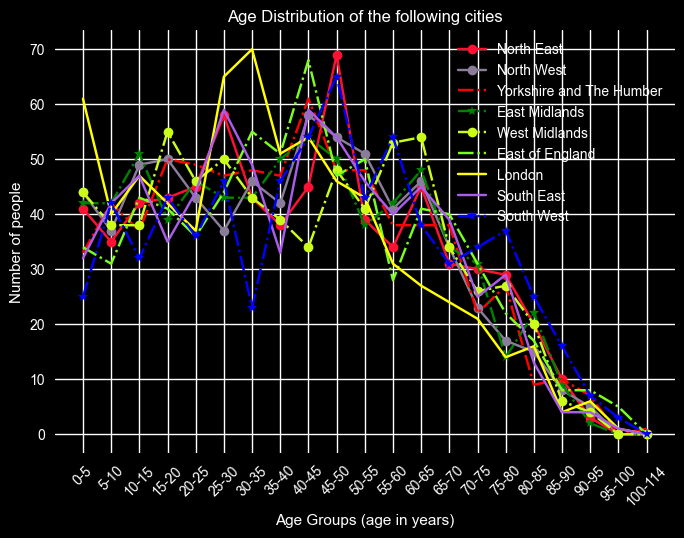

In [112]:
plt.style.use('dark_background')
# index_values.append(114)
line_styles = ['-', '--', '-.']
markers = ['o', '*', '+', 'x']
colors = ['red', 'green', 'blue','yellow', '#8a7d9a', '#1F77B4', '#7afd1f', '#ff1133', '#cafd19', '#aa5dea']

for name in sample_explore.columns:
    c = rd.choice(colors)
    plt.plot(modified_explore['Age Groups'], 
             modified_explore[name], label = name, 
             color = c, linestyle = rd.choice(line_styles),
             marker = rd.choice(markers) 
            )
    colors.remove(c)
plt.xlabel("Age Groups (age in years)")
plt.ylabel("Number of people")
plt.title("Age Distribution of the following cities")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

C:\Users\AYUSH GUPTA\AppData\Local\Temp\ipykernel_28384\3157516513.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modified_explore['Age Groups'], rotation=60)


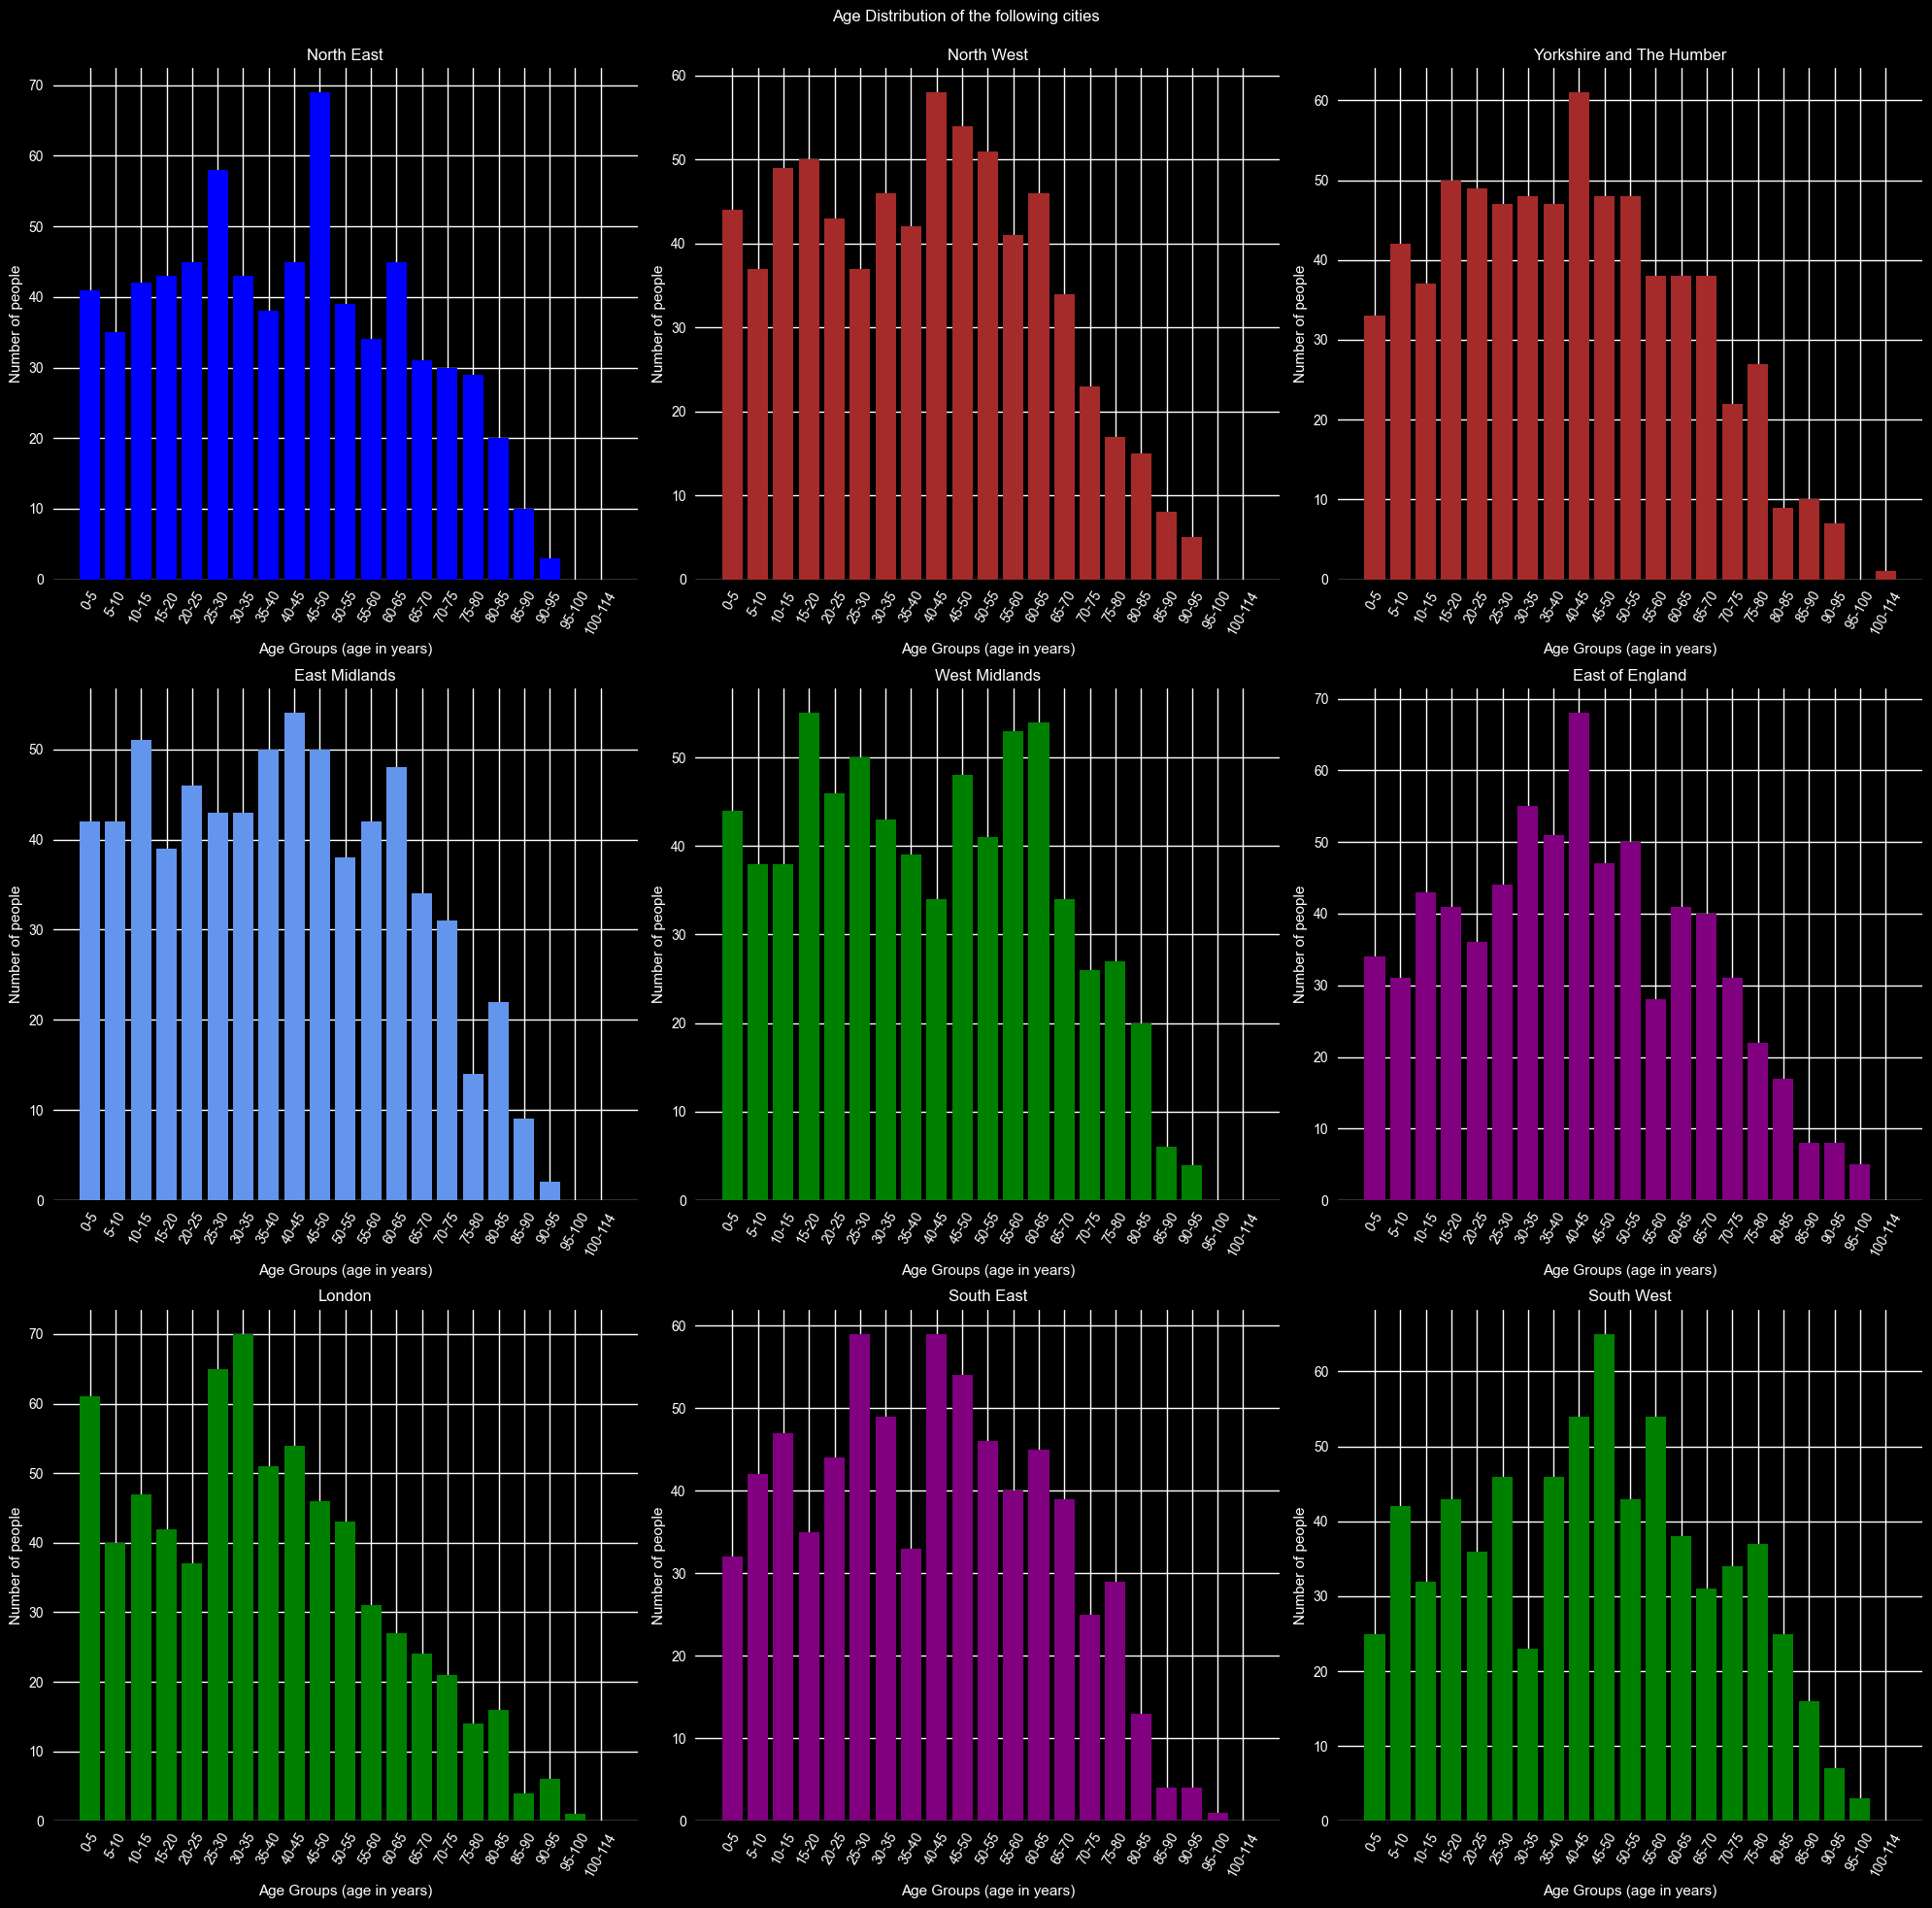

In [113]:
# for name in sample_explore.columns:
#     c = rd.choice(colors)
#     plt.bar(modified_explore['Age Groups'], 
#              modified_explore[name])
# plt.xlabel("Age Groups (age in years)")
# plt.ylabel("Number of people")
# plt.title("Age Distribution of the following cities")
# plt.grid(True)
# plt.legend()
# plt.xticks(rotation=45)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
colors = ['#FF7F50', '#6495ED', '#FFD700','brown', 'blue', 'green', 'purple', 'cyan']

for i, name in enumerate(sample_explore.columns):
    c = rd.choice(colors)
    ax = axes[i//3, i%3]  # Get the correct subplot
    ax.bar(modified_explore['Age Groups'], modified_explore[name], color=c)
    ax.set_xlabel("Age Groups (age in years)")
    ax.set_ylabel("Number of people")
    ax.set_title(name)
    ax.grid(True)
    ax.set_xticklabels(modified_explore['Age Groups'], rotation=60)


fig.suptitle("Age Distribution of the following cities")
fig.tight_layout()
fig.subplots_adjust(top=0.95)  # Add some space for the title
plt.show()

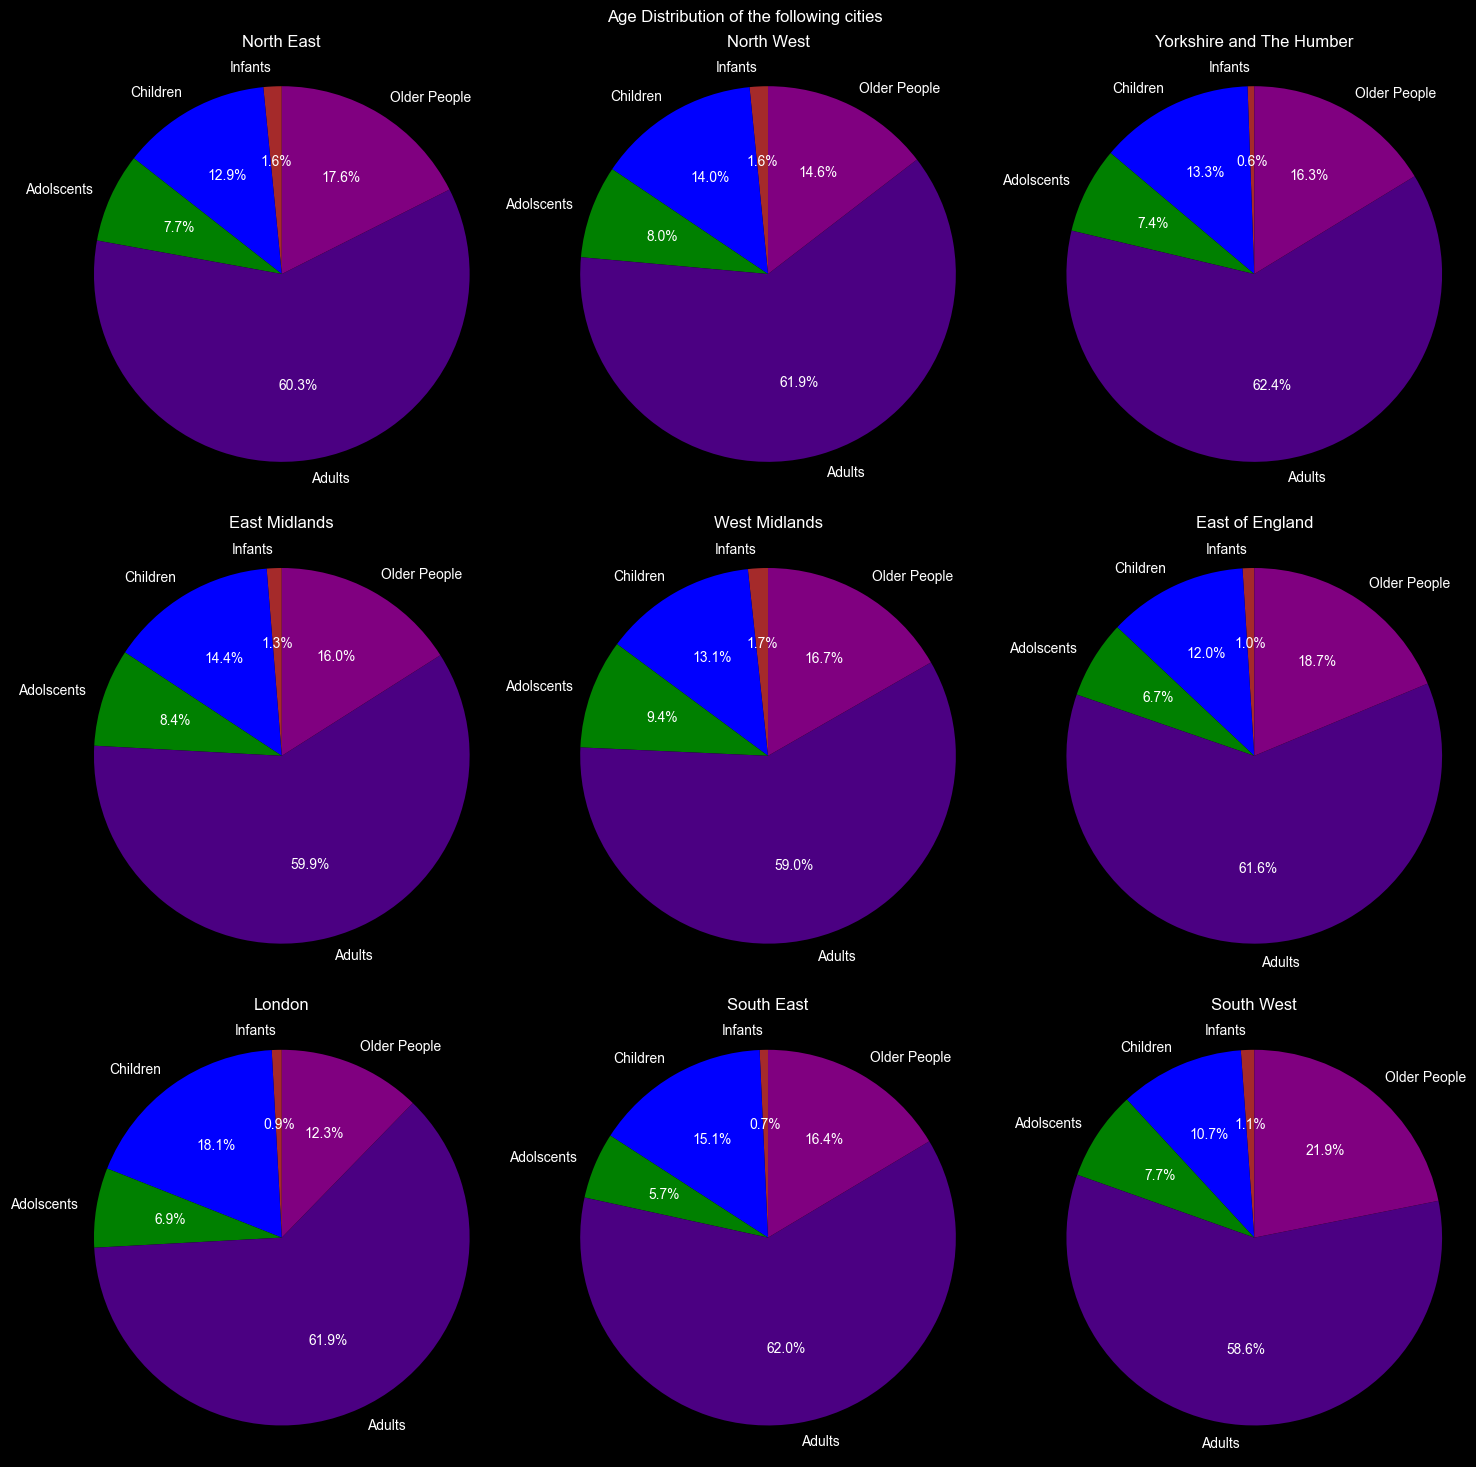

In [114]:
countsp = []
for name in sample_explore.columns: 
    counts = [0]*5
    for i in sample_explore[name]:
        if i == 0:
            counts[0] += 1
        elif i >= 1 and i <= 12:
            counts[1] += 1
        elif i >= 13 and i <= 18:
            counts[2] += 1
        elif i >= 19 and i <= 64:
            counts[3] += 1
        else: 
            counts[4] += 1
    countsp.append(counts)
fig1, axes1 = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
colors = ['brown', 'blue', 'green', 'indigo', 'purple']
labels = ['Infants', 'Children', 'Adolscents', 'Adults', 'Older People']
for i, name in enumerate(sample_explore.columns):
    c = rd.choice(colors)
    ax = axes1[i//3, i%3]  # Get the correct subplot
    ax.pie(countsp[i], colors=colors, autopct='%1.1f%%', startangle=90, labels = labels)
    ax.set_title(name)
    ax.axis('equal')

fig1.suptitle("Age Distribution of the following cities")
fig1.tight_layout()
fig1.subplots_adjust(top=0.95)  # Add some space for the title
plt.show()

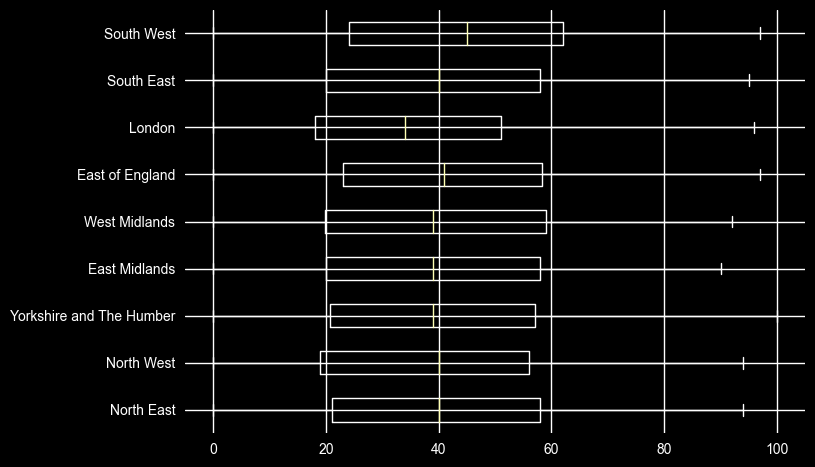

In [115]:
names = []
names1 = []
for name in sample_explore.columns:
    names.append(list(sample_explore[name]))
    names1.append(name)
plt.boxplot(names, vert = False)
plt.yticks([i+1 for i in range(len(names))], names1)
# plt.grid(True)
plt.show()

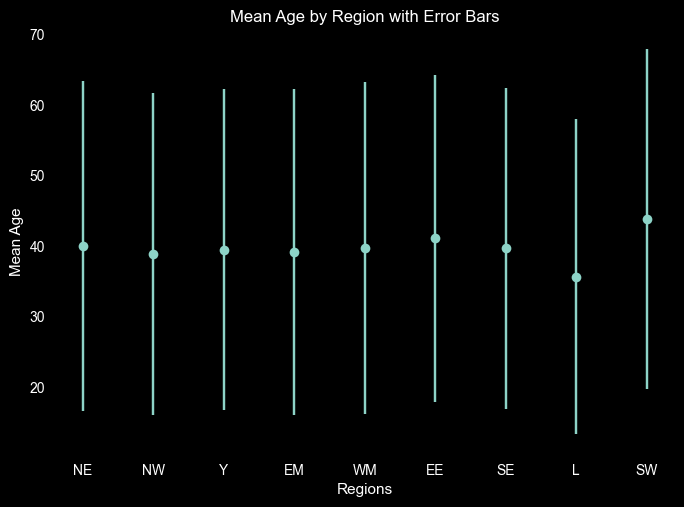

In [116]:
mean_age = [sample_explore["North East"].mean(), sample_explore["North West"].mean(), sample_explore["Yorkshire and The Humber"].mean(), sample_explore["East Midlands"].mean(), sample_explore["West Midlands"].mean(), sample_explore["East of England"].mean(), sample_explore["South East"].mean(), sample_explore["London"].mean(), sample_explore["South West"].mean()]
std_age = [sample_explore["North East"].std(ddof=1), sample_explore["North West"].std(ddof=1), sample_explore["Yorkshire and The Humber"].std(ddof=1), sample_explore["East Midlands"].std(ddof=1), sample_explore["West Midlands"].std(ddof=1), sample_explore["East of England"].std(ddof=1), sample_explore["South East"].std(ddof=1), sample_explore["London"].std(ddof=1), sample_explore["South West"].std(ddof=1)]
regions = ['NE', 'NW', 'Y', 'EM', 'WM', 'EE', 'SE', 'L', 'SW']
fig, ax = plt.subplots()
ax.errorbar(regions, mean_age, yerr=std_age, fmt='o', capsize=4)
ax.set_xlabel('Regions')
ax.set_ylabel('Mean Age')
ax.set_title('Mean Age by Region with Error Bars')
plt.grid(False)
plt.show()

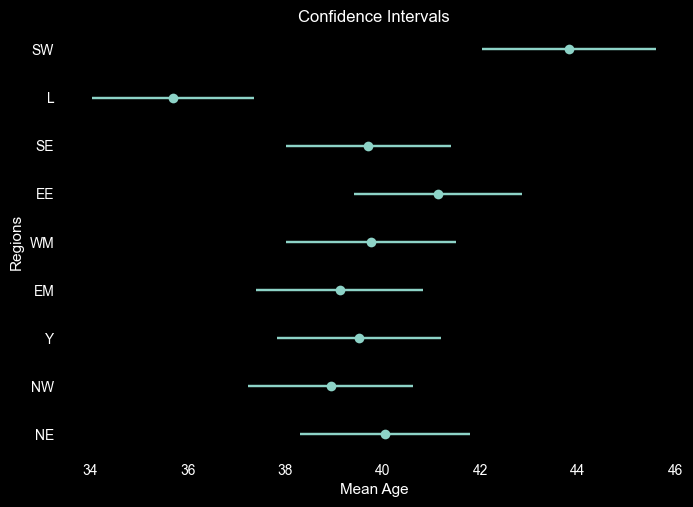

In [117]:
n = 700

# calculate critical value for 95% confidence interval (two-tailed test)
alpha = 0.05
df = 700 - 1
t_star = t.ppf(1 - alpha / 2, df)


se = std_age / np.sqrt(n)
error = [t_star * se]
fig, ax = plt.subplots()
ax.errorbar(mean_age, regions, xerr=error, fmt='o', capsize=4)
ax.set_ylabel('Regions')
ax.set_xlabel('Mean Age')
ax.set_title('Confidence Intervals')
plt.grid(False)
plt.show()

## State your hypothesis, and state the evidence that justifies it. (2 marks)

Hypothesis - The Average Age of all the nine cities is 40.

Evidence - The Line plot, Bar Graphs, and the Pie Charts show how similar the population distribution in every city is to one another. The similar population distribution reflects the fact how close the individual means of every city is, this specifically gets clearer from the Error plot and the plot of Confidence Intervals. Although London and South West show a negative and positive deviations, respectively, from the hypothesized value, but since their deviations are also by almost the same amount, hence upon taking average they will also normalize close to the hypothesized value.   

## Plan the test. (3 marks)

NULL HYPOTHESIS: The Average Age of all the nine cities is 40 years.

ALTERNATIVE HYPOTHESIS: The Average Age of all the nine cities is not equal to 40 years.

We can use Two-Tailed-One-Sampe-t-test to test this hypothesis, at the probability level of 95% i.e alpha = 0.05.

Here is we are gonna do the test:

i) Combine the whole sample data and calculate its mean.

ii) Calculate the sample standard deviation of the sample to find the standard error.

iii) Calculate the difference between the sample mean and hypothesized mean value.

iv) Calculate the division of difference by standard error, this value is called the test_statistics.

v) Using the test_statistics we will be calculating the p-value.

vi) Based on value of p-value, if its lesser than alpha, we will reject null hypothesis, otherwise not.

This is exactly how the test is gonna get performed, but we will be doing all this by passing the sample inside a function which
internally do all the steps mentioned above.

## Perform the statistical test of the hypothesis. (5 marks)

In [118]:
test = []
for name in sample_test.columns:
    for i in sample_test[name]:
        test.append(i)



sample = test
null_hypothesis = 40


t_statistic, p_value = ttest_1samp(sample, null_hypothesis)


print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("alpha-value:", .05)
if p_value < 0.05:
    print("Null Hypothesis rejected. The Average Age of all the nine cities is not equal to 40 years.")
else :
    print("Failed to reject the null hypothesis. The Average Age of all the nine cities is 40 years.")
# import math
# (39.93-40)*math.sqrt(2700)/np.std(test)


t-statistic: -0.15266282874237047
p-value: 0.8786755867412734
alpha-value: 0.05
Failed to reject the null hypothesis. The Average Age of all the nine cities is 40 years.


## Conclusions. (2 Marks) 

Using the Two-Tailed-One-Sampe-t-test, I find that the null hypothesis cannot be ruled out at 95% probability level.